# 04. Traffic Shockwaves

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import *
%matplotlib inline

**[Link to the Shockwave Problem](https://en.wikibooks.org/wiki/Fundamentals_of_Transportation/Shockwaves/Solution)**

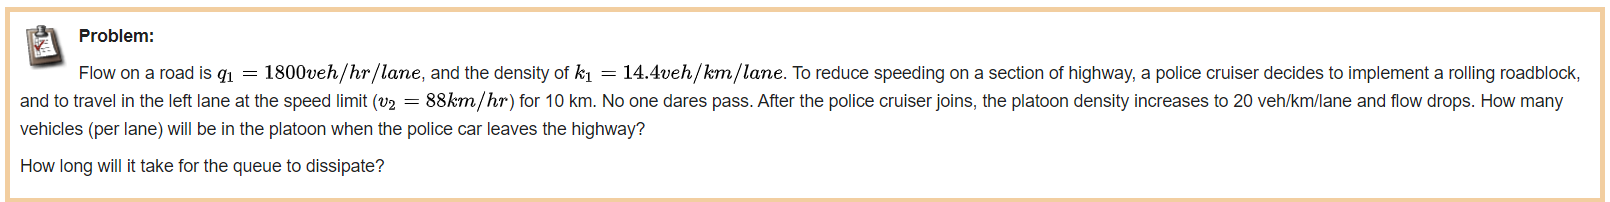

In [2]:
qa = 1800 #veh/hr
ka = 14.4
va = qa/ka
print(f'velocity v: {va} km/hr')

velocity v: 125.0 km/hr


In [3]:
kb = 20
vb = 88
qb = kb*vb
print(f'qb: {qb} veh/hr')

qb: 1760 veh/hr


In [4]:
wab = (qb-qa)/(kb-ka)
print(f'Shockwave speed: {wab} km/hr')

Shockwave speed: -7.142857142857143 km/hr


In [5]:
# We know that the parabola curve passes through points (0,0) (14.4,1800) and (20,1760)
x1,y1 = 0,0
x2,y2 = 14.4,1800 
x3,y3 = 20, 1760 

a,b,c = symbols('a,b,c')
variables = [a,b,c]

eq1 = a*x1**2 + b*x1 + c - y1
eq2 = a*x2**2 + b*x2 + c - y2
eq3 = a*x3**2 + b*x3 + c - y3
equations = [eq1,eq2,eq3] 

sol = solve(equations,variables)
sol

{a: -6.60714285714286, b: 220.142857142857, c: 0.0}

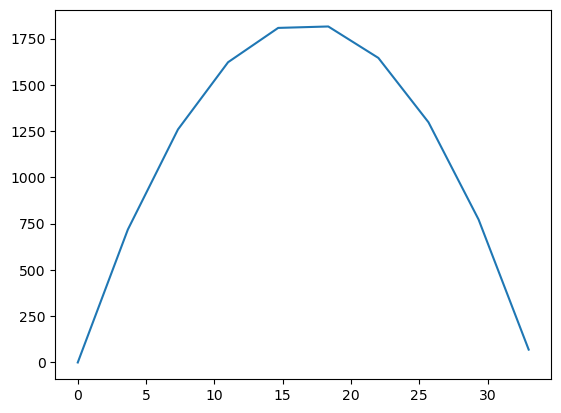

In [6]:
x = np.linspace(0,33,10)
y = sol[a]*x**2 + sol[b]*x + sol[c]
plt.plot(x,y)

In [7]:
x = -sol[b]/(2*sol[a])
x

16.6594594594595

In [8]:
#find the critical density which is the density when the traffic flow is at maximum
 
k_crit = -sol[b]/(2*sol[a])
x = k_crit
qmax = sol[a]*x**2+sol[b]*x+sol[c]
print(f'Critical density: {k_crit} veh/km') 
print(f'Maximum traffic flow: {qmax} veh/hr')

Critical density: 16.6594594594595 veh/km
Maximum traffic flow: 1833.73050193050 veh/hr


In [9]:
x = symbols('x')
y = 0
eq2 = -vb*(x-kb)+qb-y
k_jam = solve(eq2,x)[0]
print(f'Jam density is {k_jam} veh/km')

Jam density is 40 veh/km


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


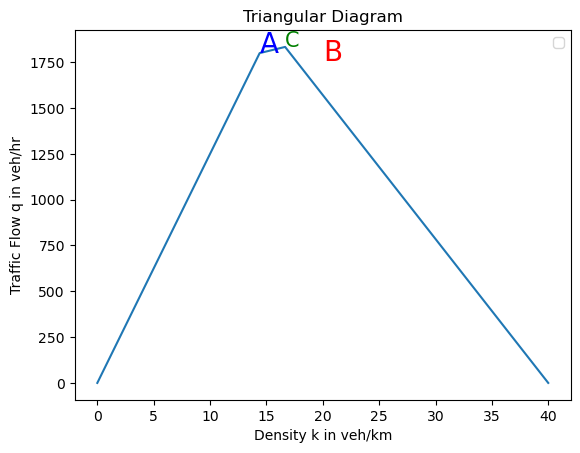

In [10]:
x = [0,ka,k_crit,k_jam]
y = [0,qa,qmax,0]
plt.plot(x,y)
plt.xlabel('Density k in veh/km')
plt.ylabel('Traffic Flow q in veh/hr')
plt.title('Triangular Diagram')
crit_den = [k_crit]
max_flow = [qmax]
plt.text(ka,qa,'A',size=20,color='blue')
plt.text(kb,qb,'B',size=20,color='red')
plt.text(k_crit,qmax,'C',size=15,color='green')
plt.legend()

In [11]:
length = 10 #km
time = round(length/vb,2)
print(f'Police time: {time} hours')

Police time: 0.11 hours


## Calculate for shockwave speeds

In [12]:
wab = (qa-qb)/(ka-kb)
wbc = (qb-qmax)/(kb-k_crit)
wca = (qmax-qa)/(k_crit-ka) 

print(f'Shockwave speed for wab: {wab} km/hr')
print(f'Shockwave speed for wbc: {wbc} km/hr')
print(f'Shockwave speed for wca: {wca} km/hr')

Shockwave speed for wab: -7.142857142857143 km/hr
Shockwave speed for wbc: -22.0714285714286 km/hr
Shockwave speed for wca: 14.9285714285715 km/hr


## Relative Speed during police cruiser area

In [13]:
v_police_shock = vb - wab 
print(f'Relative speed: {v_police_shock} km/hr')

Relative speed: 95.14285714285714 km/hr


In [14]:
queue_length = abs(v_police_shock*time)
print(f'Queue length: {queue_length} km.')

Queue length: 10.465714285714286 km.


In [15]:
num_veh = queue_length*kb 
print(f'Number of vehicles: {num_veh} vehicles')

Number of vehicles: 209.31428571428572 vehicles


## How long will the queue last?

In [16]:
wab = abs(wab)
wbc = abs(wbc)
wca = abs(wca)

In [17]:
time_dis = queue_length/(wab+wbc)
print(f'It will take {round(time_dis,3)} hours for the queue to dissipate.')
print(f'It will take {round(time_dis*60,3)} minutes for the queue to dissipate.')
print(f'It will take {round(time_dis*3600,3)} seconds for the queue to dissipate.')

It will take 0.358 hours for the queue to dissipate.
It will take 21.494 minutes for the queue to dissipate.
It will take 1289.663 seconds for the queue to dissipate.
